# Template 

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [1]:
#!pip3 install -U random-forest-mc

In [1]:
%load_ext watermark

In [1]:
#from random_forest_mc.model import RandomForestMC
#from random_forest_mc.utils import load_file_json

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd

import sys
sys.path.append('../src/random_forest_mc')
from model import *


In [3]:

from collections import Counter, defaultdict
import pandas as pd
import numpy as np
from itertools import combinations

In [7]:
# from tqdm import notebook as tqdm

from glob import glob

# import matplotlib.pyplot as plt
# %matplotlib inline
# from matplotlib import rcParams
# from cycler import cycler

# rcParams['figure.figsize'] = 12, 8 # 18, 5
# rcParams['axes.spines.top'] = False
# rcParams['axes.spines.right'] = False
# rcParams['axes.grid'] = True
# rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
# rcParams['lines.linewidth'] = 2.5

# import seaborn as sns
# sns.set_theme()

# pd.set_option("max_columns", None)
# pd.set_option("max_rows", None)
# pd.set_option('display.max_colwidth', None)

from IPython.display import Markdown, display
def md(arg):
    display(Markdown(arg))

# from pandas_profiling import ProfileReport
# #report = ProfileReport(#DataFrame here#, minimal=True)
# #report.to

# import pyarrow.parquet as pq
# #df = pq.ParquetDataset(path_to_folder_with_parquets, filesystem=None).read_pandas().to_pandas()

# import functools
# import operator
# def flat(a):
#     return functools.reduce(operator.iconcat, a, [])


######### LoadDicts

import json
from glob import glob
from typing import Any
from typing import NewType

def np_encoder(object):
    if isinstance(object, np.generic):
        return object.item()


DictsPathType = NewType("DictsPath", str)


def load_file_json(path: DictsPathType):
    with open(path, "r") as f:
        return json.load(f)


def dump_file_json(path: DictsPathType, var: Any):
    with open(path, "w") as f:
        return json.dump(var, f, indent=4, default=np_encoder)


class LoadDicts:
    def __init__(self, dict_path: DictsPathType = "./data"):
        Dicts_glob = glob(f"{dict_path}/*.json")
        self.List = []
        self.Dict = {}
        for path_json in Dicts_glob:
            name = path_json.split("/")[-1].replace(".json", "")
            self.List.append(name)
            self.Dict[name] = load_file_json(path_json)
            setattr(self, name, self.Dict[name])

    def __repr__(self) -> str:
        return "LoadDicts: {}".format(", ".join(self.List))

In [8]:
# Run this cell before close.
%watermark -d --iversion -b -r -g -m -v
!cat /proc/cpuinfo |grep 'model name'|head -n 1 |sed -e 's/model\ name/CPU/'
!free -h |cut -d'i' -f1  |grep -v total

UsageError: Line magic function `%watermark` not found.


In [13]:
modeldict = load_file_json('/work/tmp/cls_rfmc_creditcard_trans_int.json')
modeldict.keys()

dict_keys(['batch_train_pclass', 'batch_val_pclass', '_N', 'min_feature', 'max_feature', 'th_start', 'delta_th', 'max_discard_trees', 'n_trees', 'class_vals', 'survived_scores', 'version', 'numeric_cols', 'feature_cols', 'type_of_cols', 'target_col', 'Forest'])

In [14]:
cls = RandomForestMC()
cls.dict2model(modeldict)

In [15]:
len(cls.Forest)

8

In [16]:
cls.target_col = 'Class'

In [17]:
df = pd.read_csv('/work/tmp/datasets/creditcard_trans_int.csv')
target_col = 'Class'
ds_cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
df = df[ds_cols+[target_col]].dropna()
df[target_col] = df[target_col].astype(str)
df_fraud = df.query('Class == "1"').reset_index(drop=True).copy()
df_truth = df.query('Class == "0"').reset_index(drop=True).copy()
df_train = pd.concat([df_fraud, df_truth.sample(n=500)]).reset_index(drop=True)
cls.process_dataset(df_train)

In [18]:
stats,_ = cls.featCount()
stats

(4.375, 1.3169567191065923, 1, 5)

In [19]:
sorted(cls.featImportance().items(), key=lambda x:x[1], reverse=True)

[('V16', 0.5),
 ('V1', 0.375),
 ('V4', 0.375),
 ('V5', 0.375),
 ('V17', 0.375),
 ('V27', 0.375),
 ('V2', 0.25),
 ('V3', 0.25),
 ('V9', 0.25),
 ('V12', 0.25),
 ('V21', 0.25),
 ('V25', 0.25),
 ('V6', 0.125),
 ('V7', 0.125),
 ('V14', 0.125),
 ('V23', 0.125),
 ('V8', 0.0),
 ('V10', 0.0),
 ('V11', 0.0),
 ('V13', 0.0),
 ('V15', 0.0),
 ('V18', 0.0),
 ('V19', 0.0),
 ('V20', 0.0),
 ('V22', 0.0),
 ('V24', 0.0),
 ('V26', 0.0),
 ('V28', 0.0),
 ('Amount', 0.0)]

In [20]:
sorted(cls.featScoreMean().items(), key=lambda x:x[1], reverse=True)

/usr/local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[('V2', 0.9),
 ('V6', 0.9),
 ('V1', 0.85),
 ('V8', nan),
 ('V9', 0.875),
 ('V4', 0.8666666666666667),
 ('V3', 0.8500000000000001),
 ('V5', 0.8166666666666668),
 ('V7', 0.8),
 ('V10', nan),
 ('V11', nan),
 ('V13', nan),
 ('V14', 0.9),
 ('V15', nan),
 ('V17', 0.8333333333333334),
 ('V12', 0.75),
 ('V18', nan),
 ('V19', nan),
 ('V20', nan),
 ('V21', 0.875),
 ('V22', nan),
 ('V23', 0.85),
 ('V16', 0.825),
 ('V24', nan),
 ('V25', 0.9),
 ('V26', nan),
 ('V27', 0.8000000000000002),
 ('V28', nan),
 ('Amount', nan)]

In [21]:
pimp = cls.featPairImportance()
sorted(pimp.items(), key=lambda x:x[1], reverse=True)

Counting pair occurences: 100%|██████████| 8/8 [00:00<00:00, 97.87it/s]


[(('V4', 'V16'), 0.375),
 (('V1', 'V5'), 0.25),
 (('V2', 'V25'), 0.25),
 (('V5', 'V16'), 0.25),
 (('V5', 'V17'), 0.25),
 (('V9', 'V21'), 0.25),
 (('V12', 'V27'), 0.25),
 (('V16', 'V27'), 0.25),
 (('V1', 'V2'), 0.125),
 (('V1', 'V3'), 0.125),
 (('V1', 'V4'), 0.125),
 (('V1', 'V7'), 0.125),
 (('V1', 'V12'), 0.125),
 (('V1', 'V16'), 0.125),
 (('V1', 'V17'), 0.125),
 (('V1', 'V25'), 0.125),
 (('V1', 'V27'), 0.125),
 (('V2', 'V4'), 0.125),
 (('V2', 'V5'), 0.125),
 (('V2', 'V16'), 0.125),
 (('V2', 'V17'), 0.125),
 (('V2', 'V27'), 0.125),
 (('V3', 'V6'), 0.125),
 (('V3', 'V7'), 0.125),
 (('V3', 'V9'), 0.125),
 (('V3', 'V12'), 0.125),
 (('V3', 'V17'), 0.125),
 (('V3', 'V21'), 0.125),
 (('V3', 'V27'), 0.125),
 (('V4', 'V5'), 0.125),
 (('V4', 'V9'), 0.125),
 (('V4', 'V21'), 0.125),
 (('V4', 'V23'), 0.125),
 (('V4', 'V25'), 0.125),
 (('V4', 'V27'), 0.125),
 (('V5', 'V12'), 0.125),
 (('V5', 'V25'), 0.125),
 (('V5', 'V27'), 0.125),
 (('V6', 'V9'), 0.125),
 (('V6', 'V17'), 0.125),
 (('V6', 'V21'), 0

In [22]:
corr = cls.featCorrDataFrame()
corr

Counting pair occurences: 100%|██████████| 8/8 [00:00<00:00, 97.51it/s]


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,0.375,0.125,0.125,0.125,0.250,0.000,0.125,0.0,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.125,0.0,0.125,0.0,0.0
V2,0.125,0.250,0.000,0.125,0.125,0.000,0.000,0.0,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.250,0.0,0.125,0.0,0.0
V3,0.125,0.000,0.250,0.000,0.000,0.125,0.125,0.0,0.125,0.0,...,0.0,0.125,0.0,0.000,0.0,0.000,0.0,0.125,0.0,0.0
V4,0.125,0.125,0.000,0.375,0.125,0.000,0.000,0.0,0.125,0.0,...,0.0,0.125,0.0,0.125,0.0,0.125,0.0,0.125,0.0,0.0
V5,0.250,0.125,0.000,0.125,0.375,0.000,0.000,0.0,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.125,0.0,0.125,0.0,0.0
V6,0.000,0.000,0.125,0.000,0.000,0.125,0.000,0.0,0.125,0.0,...,0.0,0.125,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0
V7,0.125,0.000,0.125,0.000,0.000,0.000,0.125,0.0,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.125,0.0,0.0
V8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0
V9,0.000,0.000,0.125,0.125,0.000,0.125,0.000,0.0,0.250,0.0,...,0.0,0.250,0.0,0.125,0.0,0.000,0.0,0.000,0.0,0.0
V10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0


<AxesSubplot:>

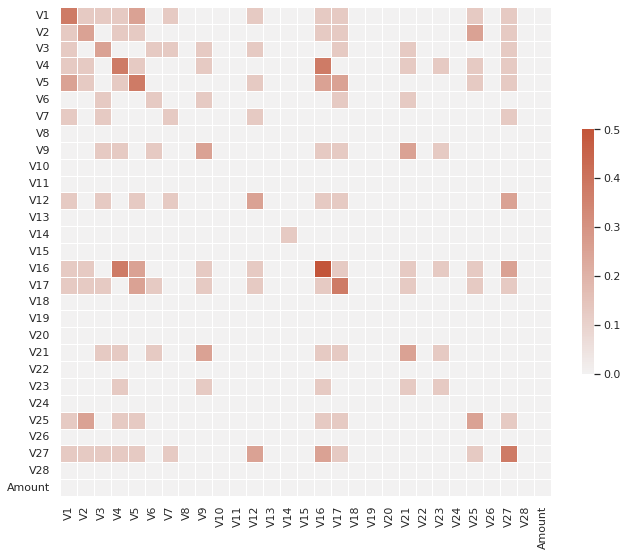

In [23]:
sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=corr.max().max(), center=0,
            linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

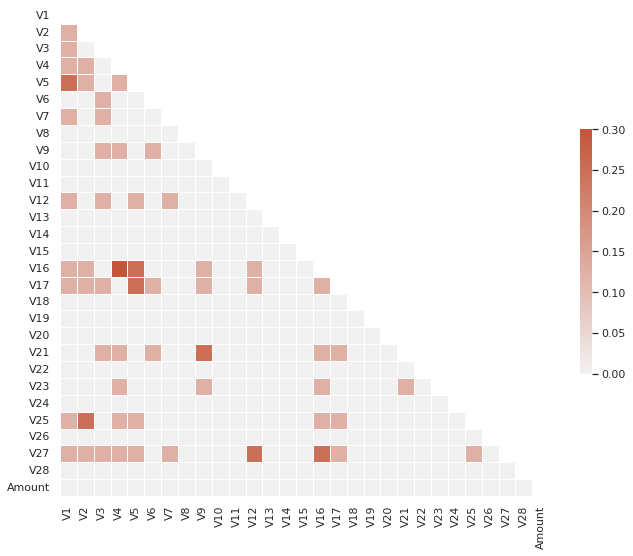

In [24]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Using sample based feat. importance.

In [25]:
row_fraud = df_fraud.sample().reset_index(drop=True).loc[0]
row_truth = df_truth.sample().reset_index(drop=True).loc[0]
rows = [row_fraud, row_truth]
display(rows)

[V1         523315350
 V2         736787589
 V3         432495193
 V4        1063913457
 V5        1135818700
 V6         233278430
 V7         359374762
 V8         748356140
 V9        1044197417
 V10        174460634
 V11       1107613932
 V12        927665370
 V13        397300726
 V14        847475361
 V15        472315077
 V16        570277173
 V17       1166064649
 V18        478577834
 V19        984400343
 V20        545565818
 V21        358611205
 V22       1109847148
 V23        437902330
 V24        235864355
 V25        999041026
 V26        249846129
 V27        244653938
 V28        159415457
 Amount           1.0
 Class              1
 Name: 0, dtype: object,
 V1         554005601
 V2         733289405
 V3         467607404
 V4         612451887
 V5        1117883908
 V6         330340853
 V7         483708921
 V8         729042824
 V9        1440556409
 V10        240474631
 V11        541014159
 V12       1561169573
 V13        737719079
 V14       2030252148
 V15   

In [26]:
cls.testForest(df_fraud)

['1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1'

In [27]:
for row in rows:
    stats,_ = cls.sampleClassFeatCount(row,row.Class)
    display({row.Class: stats})

{'1': (4.285714285714286, 1.3850513878332367, 1, 5)}

{'0': (4.166666666666667, 1.462494064565354, 1, 5)}

In [28]:
for func in ['sampleClassFeatImportance','sampleClassFeatScoreMean','sampleClassFeatPairImportance']:
    md(f'## {func}')
    for row in rows:
        out = getattr(cls, func)(row,row.Class)
        display({row.Class: sorted(out.items(),key=lambda x:x[1], reverse=True)[:5]})

## sampleClassFeatImportance

{'1': [('V16', 0.5714285714285714),
  ('V4', 0.42857142857142855),
  ('V27', 0.42857142857142855),
  ('V1', 0.2857142857142857),
  ('V3', 0.2857142857142857)]}

{'0': [('V16', 0.6666666666666666),
  ('V4', 0.5),
  ('V5', 0.3333333333333333),
  ('V9', 0.3333333333333333),
  ('V17', 0.3333333333333333)]}

## sampleClassFeatScoreMean

/usr/local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'1': [('V2', 0.9),
  ('V6', 0.9),
  ('V5', 0.875),
  ('V4', 0.8666666666666667),
  ('V8', nan)]}

{'0': [('V2', 0.9),
  ('V3', 0.9),
  ('V6', 0.9),
  ('V5', 0.875),
  ('V4', 0.8666666666666667)]}

## sampleClassFeatPairImportance

{'1': [(('V4', 'V16'), 0.375),
  (('V1', 'V5'), 0.25),
  (('V2', 'V25'), 0.25),
  (('V5', 'V16'), 0.25),
  (('V5', 'V17'), 0.25)]}

{'0': [(('V4', 'V16'), 0.375),
  (('V1', 'V5'), 0.25),
  (('V2', 'V25'), 0.25),
  (('V5', 'V16'), 0.25),
  (('V5', 'V17'), 0.25)]}

Counting pair occurences: 100%|██████████| 6/6 [00:00<00:00, 102.39it/s]


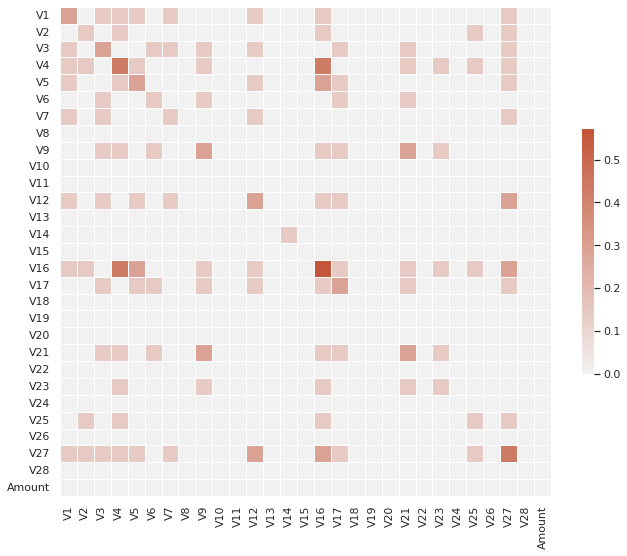

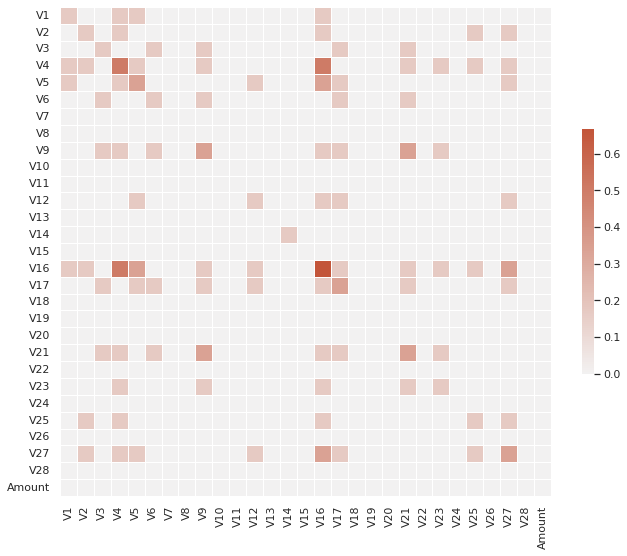

In [29]:
for row in rows:
    corr = cls.sampleClassFeatCorrDataFrame(row,row.Class)
    sns.set_theme(style="white")

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, cmap=cmap, vmax=corr.max().max(), center=0,
                linewidths=.5, cbar_kws={"shrink": .5})

# Draft 2

In [49]:
row = df_train.sample().reset_index(drop=True).loc[0]
Tree = cls.Forest[0]
Class = cls.maxProbClas(cls.useForest(row))

def treeFeats(Tree):
    return [feat for feat in cls.feature_cols if f"'{feat}'" in str(Tree)]

cls.treeFeats = treeFeats

Forest = [Tree for Tree in cls.Forest if cls.maxProbClas(cls.useTree(Tree, row)) == Class]

In [51]:
len(cls.Forest)

160

# Draft 1

In [30]:
out = [len([feat for feat in cls.feature_cols if f"'{feat}'" in str(Tree)]) for Tree in cls.Forest]
(np.mean(out), np.std(out), min(out), max(out)), out

((9.0234375, 0.15128841196122722, 9, 10),
 [9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  10,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  10,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  10,
  9,
  9])

In [11]:
"\'V1\'" in str(cls.Forest[0])

True

In [12]:
feat_counts = {feat: sum([f"'{feat}'" in str(Tree) for Tree in cls.Forest])/len(cls.Forest) for feat in cls.feature_cols}
sorted(feat_counts.items(), key=lambda x: x[1], reverse=True)

[('V14', 0.8046875),
 ('V4', 0.75),
 ('V16', 0.4375),
 ('V12', 0.4296875),
 ('V3', 0.3984375),
 ('V10', 0.3984375),
 ('V17', 0.375),
 ('V5', 0.34375),
 ('V11', 0.34375),
 ('Amount', 0.328125),
 ('V1', 0.3203125),
 ('V2', 0.3046875),
 ('V7', 0.2890625),
 ('V19', 0.2890625),
 ('V8', 0.28125),
 ('V18', 0.28125),
 ('V15', 0.2578125),
 ('V21', 0.2578125),
 ('V24', 0.234375),
 ('V9', 0.2265625),
 ('V23', 0.2265625),
 ('V28', 0.2265625),
 ('V20', 0.203125),
 ('V22', 0.203125),
 ('V6', 0.1953125),
 ('V13', 0.1796875),
 ('V26', 0.1640625),
 ('V27', 0.1484375),
 ('V25', 0.125)]

In [129]:
sum_scores = sum(cls.survived_scores)
feat_counts = {feat: np.mean(list(filter(lambda num: num != 0,[(f"'{feat}'" in str(Tree))*score for Tree,score in zip(cls.Forest,cls.survived_scores)]))) for feat in cls.feature_cols}
sorted(feat_counts.items(), key=lambda x: x[1], reverse=True)

[('V22', 0.9237355110642783),
 ('V8', 0.9237062404870624),
 ('V20', 0.9234720758693361),
 ('V21', 0.9232046492320464),
 ('V28', 0.9222957014643363),
 ('V16', 0.922272504892368),
 ('V5', 0.9220890410958907),
 ('V11', 0.9220890410958907),
 ('V4', 0.9220890410958905),
 ('V3', 0.9219715283373626),
 ('V19', 0.9217882265827473),
 ('V25', 0.9214469178082192),
 ('V14', 0.9211663785077804),
 ('V13', 0.9209350804050026),
 ('Amount', 0.9208251793868234),
 ('V7', 0.9207700851536469),
 ('V18', 0.9207572298325724),
 ('V10', 0.9206956755304861),
 ('V1', 0.9206481790845308),
 ('V6', 0.9205479452054794),
 ('V12', 0.9203611457036116),
 ('V17', 0.9202340182648401),
 ('V9', 0.919933868682097),
 ('V27', 0.9197909156452774),
 ('V15', 0.9197799916977998),
 ('V2', 0.9193010186160874),
 ('V26', 0.9192759295499021),
 ('V23', 0.9188710439300894),
 ('V24', 0.9187214611872143)]

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(df[ds_cols], df[target_col])

RandomForestClassifier()

In [35]:
feat_counts_baseline = {feat: score for feat,score in zip(ds_cols, forest.feature_importances_)}

In [36]:
sorted(feat_counts_baseline.items(), key=lambda x: x[1], reverse=True)

[('V12', 0.145750137242988),
 ('V17', 0.13073994696652233),
 ('V14', 0.10869943505722834),
 ('V10', 0.10659552465814812),
 ('V11', 0.07494282109076995),
 ('V16', 0.07007434988401999),
 ('V9', 0.03723455894197347),
 ('V18', 0.031377649659517226),
 ('V7', 0.02974542566681773),
 ('V4', 0.02442541464406295),
 ('V26', 0.020258285882117703),
 ('V21', 0.01801605889498627),
 ('V1', 0.01675503823468746),
 ('V6', 0.016007484083145247),
 ('V3', 0.014916958829971082),
 ('V20', 0.01349498078472359),
 ('V27', 0.012218137804112314),
 ('V8', 0.011852712616607844),
 ('V19', 0.011730061830087143),
 ('V5', 0.011602808187383826),
 ('Amount', 0.01133494532179039),
 ('V2', 0.011281574126221659),
 ('V28', 0.011259359502862502),
 ('V13', 0.01094957985420983),
 ('V22', 0.010747722550576653),
 ('V25', 0.010685071237540667),
 ('V15', 0.010582035128143272),
 ('V24', 0.009877699910013103),
 ('V23', 0.006844221408771363)]

In [66]:
ForestFake = [str(cls.sampleFeats()) for _ in range(1024*10)]
feat_counts = {feat: sum([f"'{feat}'" in str(Tree) for Tree in ForestFake])/len(ForestFake) for feat in cls.feature_cols}
sorted(feat_counts.items(), key=lambda x: x[1], reverse=True)

[('V21', 0.75126953125),
 ('V27', 0.7501953125),
 ('V19', 0.74736328125),
 ('V25', 0.74482421875),
 ('V17', 0.74462890625),
 ('V3', 0.7443359375),
 ('V18', 0.744140625),
 ('V22', 0.74404296875),
 ('V26', 0.7439453125),
 ('V6', 0.74375),
 ('V8', 0.74365234375),
 ('V4', 0.743359375),
 ('V23', 0.74326171875),
 ('V24', 0.74296875),
 ('V16', 0.74287109375),
 ('V13', 0.7427734375),
 ('V7', 0.74267578125),
 ('V1', 0.7423828125),
 ('V20', 0.7419921875),
 ('V11', 0.74189453125),
 ('V9', 0.7412109375),
 ('Amount', 0.7404296875),
 ('V12', 0.74033203125),
 ('V15', 0.73994140625),
 ('V10', 0.73876953125),
 ('V14', 0.737890625),
 ('V2', 0.73740234375),
 ('V28', 0.73662109375),
 ('V5', 0.7361328125)]

In [14]:
cls.featScoreMean()

{'V1': 0.9206481790845308,
 'V2': 0.9193010186160874,
 'V3': 0.9219715283373626,
 'V4': 0.9220890410958905,
 'V5': 0.9220890410958907,
 'V6': 0.9205479452054794,
 'V7': 0.9207700851536469,
 'V8': 0.9237062404870624,
 'V9': 0.919933868682097,
 'V10': 0.9206956755304861,
 'V11': 0.9220890410958907,
 'V12': 0.9203611457036116,
 'V13': 0.9209350804050026,
 'V14': 0.9211663785077804,
 'V15': 0.9197799916977998,
 'V16': 0.922272504892368,
 'V17': 0.9202340182648401,
 'V18': 0.9207572298325724,
 'V19': 0.9217882265827473,
 'V20': 0.9234720758693361,
 'V21': 0.9232046492320464,
 'V22': 0.9237355110642783,
 'V23': 0.9188710439300894,
 'V24': 0.9187214611872143,
 'V25': 0.9214469178082192,
 'V26': 0.9192759295499021,
 'V27': 0.9197909156452774,
 'V28': 0.9222957014643363,
 'Amount': 0.9208251793868234}

In [16]:
Tree = cls.Forest[0]
[feat for feat in cls.feature_cols if f"'{feat}'" in str(Tree)]

['V1', 'V3', 'V4', 'V10', 'V14', 'V16', 'V17', 'V20', 'V23']

In [92]:
pair_count = defaultdict(int)
ntrees = len(cls.Forest)
for Tree in tqdm(cls.Forest):
    for pair in combinations(cls.feature_cols,2):
        pair_count[pair] += (f"'{pair[0]}'" in str(Tree) and f"'{pair[1]}'" in str(Tree))/ntrees

100%|██████████| 128/128 [00:14<00:00,  8.74it/s]


In [93]:
sorted(pair_count.items(), key=lambda x:x[1], reverse=True)

[(('V4', 'V14'), 0.5703125),
 (('V4', 'V16'), 0.359375),
 (('V3', 'V4'), 0.3203125),
 (('V10', 'V14'), 0.3203125),
 (('V14', 'V16'), 0.3203125),
 (('V4', 'V12'), 0.3125),
 (('V12', 'V14'), 0.3046875),
 (('V3', 'V14'), 0.2890625),
 (('V14', 'V17'), 0.28125),
 (('V4', 'V5'), 0.2734375),
 (('V4', 'V10'), 0.2734375),
 (('V5', 'V14'), 0.265625),
 (('V4', 'V11'), 0.2578125),
 (('V1', 'V4'), 0.25),
 (('V2', 'V14'), 0.25),
 (('V11', 'V14'), 0.25),
 (('V14', 'V15'), 0.25),
 (('V1', 'V14'), 0.2421875),
 (('V4', 'V17'), 0.2421875),
 (('V14', 'Amount'), 0.2421875),
 (('V2', 'V4'), 0.2265625),
 (('V4', 'V19'), 0.2265625),
 (('V7', 'V14'), 0.21875),
 (('V8', 'V14'), 0.21875),
 (('V14', 'V18'), 0.21875),
 (('V14', 'V21'), 0.21875),
 (('V4', 'V8'), 0.2109375),
 (('V14', 'V19'), 0.2109375),
 (('V4', 'V7'), 0.1953125),
 (('V4', 'V15'), 0.1953125),
 (('V4', 'V18'), 0.1953125),
 (('V14', 'V24'), 0.1953125),
 (('V4', 'V21'), 0.1875),
 (('V4', 'V24'), 0.1875),
 (('V4', 'Amount'), 0.1875),
 (('V12', 'V16'), 

In [96]:
N = len(cls.feature_cols)
matrix = np.zeros((N,N), dtype=np.float16)

for feat,count in feat_counts.items():
    idx = cls.feature_cols.index(feat)
    matrix[idx][idx] = count

for pair,count in pair_count.items():
    idxa = cls.feature_cols.index(pair[0])
    idxb = cls.feature_cols.index(pair[1])
    matrix[idxa][idxb], matrix[idxb][idxa] = count, count
    
corr = pd.DataFrame(matrix, index=cls.feature_cols, columns=cls.feature_cols)

<AxesSubplot:>

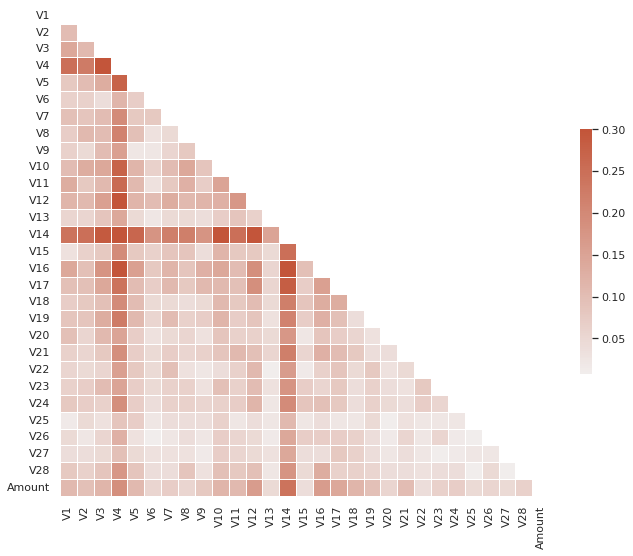

In [99]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})